In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [17]:
pd.set_option('display.max_colwidth', None)  # display full content of columns
pd.set_option('display.max_columns', None)  # display full columns of dataframes

In [3]:
df = pd.read_csv('tiki_product_data.csv')

# Phân tích dữ liệu về 3 loại sản phẩm điện thoại, laptop và máy tính bảng hiện đang được mở bán trên sàn Tiki (tính đến 11/2024)

In [18]:
df.columns

Index(['id', 'product_name', 'price(vnd)', 'original_price', 'discount',
       'discount_rate(%)', 'review_count', 'rating_average', 'quantity_sold',
       'brand_name', 'origin', 'subcategory_name', 'category_name',
       'total_sales_per_product', 'price_range'],
      dtype='object')

In [23]:
# calculate total revenue
df['total_sales_per_product'] = df['price(vnd)'] * df['quantity_sold']

In [25]:
df.head()

,id,product_name,price(vnd),original_price,discount,discount_rate(%),review_count,rating_average,quantity_sold,brand_name,origin,subcategory_name,category_name,total_sales_per_product,price_range
0,4048043,Điện Thoại Bàn Panasonic KX-TS500,334000,369000,35000,9,25,4.5,315.0,Panasonic,NaN,dien-thoai-ban,Điện thoại,105210000.0,< 1tr
1,4048581,Điện Thoại Bàn Panasonic KX-TSC11,714000,759000,45000,6,9,4.5,66.0,Panasonic,NaN,dien-thoai-ban,Điện thoại,47124000.0,< 1tr
2,11251711,Điện thoại bàn không dây Panasonic KX-TGD312 - Hàng Chính Hãng,2190000,2190000,0,0,2,5.0,11.0,Panasonic,NaN,dien-thoai-ban,Điện thoại,24090000.0,1tr - 5tr
3,11251770,Điện thoại bàn không dây Panasonic KX-TGD310 - Hàng Chính Hãng,1430000,1430000,0,0,0,0.0,4.0,Panasonic,NaN,dien-thoai-ban,Điện thoại,5720000.0,1tr - 5tr
4,11251951,Điện thoại bàn không dây Panasonic KX-TGB110-Hàng Chính Hãng,890000,890000,0,0,1,5.0,17.0,Panasonic,NaN,dien-thoai-ban,Điện thoại,15130000.0,< 1tr


In [26]:
df.describe().style.format('{:,.1f}')

,id,price(vnd),original_price,discount,discount_rate(%),review_count,rating_average,quantity_sold,total_sales_per_product
count,312.0,312.0,312.0,312.0,312.0,312.0,312.0,312.0,312.0
mean,"251,689,651.0","7,504,659.6","8,264,989.7","760,330.1",10.6,14.1,1.9,196.7,"1,125,776,926.3"
std,"56,879,223.9","7,992,451.5","8,519,253.9","1,619,784.9",12.7,120.3,2.4,"1,712.4","8,589,228,119.3"
min,"4,048,043.0","220,000.0","250,000.0",0.0,0.0,0.0,0.0,0.0,0.0
25%,"271,845,104.2","2,587,000.0","3,290,000.0","15,000.0",0.0,0.0,0.0,0.0,0.0
50%,"276,494,712.0","3,994,500.0","4,900,000.0","30,000.0",1.0,0.0,0.0,1.0,"3,964,000.0"
75%,"277,962,044.5","9,670,000.0","10,555,000.0","950,250.0",20.2,2.0,5.0,9.0,"30,648,000.0"
max,"278,776,793.0","45,269,000.0","46,990,000.0","13,020,000.0",54.0,"2,056.0",5.0,"28,128.0","115,043,520,000.0"


## Thống kê số lượng sản phẩm đang được mở bán, doanh thu và tổng số lượt bán theo danh mục hàng hóa và thương hiệu

### Thống kê số lượng sản phẩm đang được mở bán và tổng số lượt bán theo danh mục hàng hóa

In [27]:
df1 = df.groupby(['category_name','subcategory_name'])['quantity_sold'].count().reset_index().rename(columns={'quantity_sold':'total_products'})
df2 = df.groupby(['category_name', 'subcategory_name'])['quantity_sold'].sum().reset_index().rename(columns={'quantity_sold':'total_quantity_sold'})
df3 = df.groupby(['category_name', 'subcategory_name'])['total_sales_per_product'].sum().reset_index().rename(columns={'total_sales_per_product':'total_sales(vnd)'})
df2['total_quantity_sold'] = df2['total_quantity_sold'].apply(lambda x: f'{x:,.0f}')
df3['total_sales(vnd)'] = df3['total_sales(vnd)'].apply(lambda x: f'{x:,.0f}')

In [28]:
# join 3 dataframes df1, df2, df3
df_1_2 = pd.merge(df1, df2, on=['category_name', 'subcategory_name'])
df_category = pd.merge(df_1_2, df3, on=['category_name', 'subcategory_name'])
df_category

,category_name,subcategory_name,total_products,total_quantity_sold,total_sales(vnd)
0,Laptop,laptop-2-trong-1,5,3,"14,880,000"
1,Laptop,laptop-gaming,8,3,"52,193,000"
2,Laptop,laptop-truyen-thong,59,55,"483,865,000"
3,Laptop,macbook-imac,2,10,"222,440,000"
4,Máy tính bảng,may-doc-sach,17,"2,686","11,603,640,000"
5,Máy tính bảng,may-tinh-bang,17,"1,493","6,120,071,000"
6,Điện thoại,dien-thoai-ban,34,"2,396","1,455,076,000"
7,Điện thoại,dien-thoai-pho-thong,13,248,"143,182,000"
8,Điện thoại,dien-thoai-smartphone,157,"54,491","331,147,054,000"


* Các sản phẩm **điện thoại smartphone** ghi nhật lượt bán và doanh thu cao vượt trội so với các sản phẩm còn lại

### Top các thương hiệu (brand) ghi nhận mức doanh thu cao nhất

In [29]:
df_by_brand = df.groupby(['category_name', 'brand_name'])['total_sales_per_product'].sum().reset_index().rename(columns={'total_sales_per_product':'total_sales(vnd)'})
df_by_brand_top_10 = df_by_brand.sort_values(by='total_sales(vnd)', ascending=False).head(10)
# df_by_brand_top_10.style.format('{:,.1f}')
df_by_brand_top_10

,category_name,brand_name,total_sales(vnd)
23,Điện thoại,OPPO,1.596010e+11
16,Điện thoại,Apple,1.349992e+11
31,Điện thoại,Xiaomi,2.709187e+10
9,Máy tính bảng,Kindle,9.246760e+09
27,Điện thoại,Samsung,8.322133e+09
14,Máy tính bảng,Samsung,3.362051e+09
8,Máy tính bảng,Apple,2.690000e+09
10,Máy tính bảng,Kobo,2.055900e+09
25,Điện thoại,Panasonic,1.397066e+09
26,Điện thoại,Realme,8.764440e+08


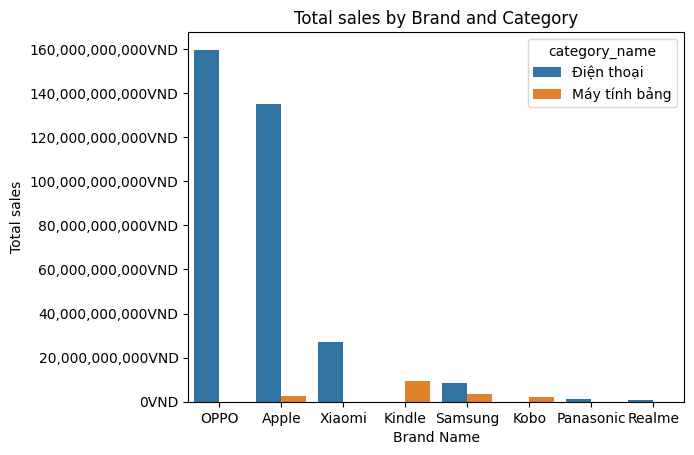

In [11]:
sns.barplot(x='brand_name', y='total_sales(vnd)', hue='category_name', data=df_by_brand_top_10)
# Format the y-axis labels with thousands separator
fmt = '{x:,.0f}VND'
tick = mtick.StrMethodFormatter(fmt)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick)

# Customize the plot
plt.title('Total sales by Brand and Category')
plt.xlabel('Brand Name')
plt.ylabel('Total sales')

plt.show()

* Các sản phẩm của thương hiệu **Apple** ghi nhận mức doanh thu vượt trội với **hơn 400 tỷ VND**.
* **POCO**, thương hiệu con của Tập đoàn Xiaomi (Trung Quốc) xếp vị trí thứ 2 về doanh thu, tập trung chủ yếu vào điện thoại Smartphone.

## Thống kê số lượt bán theo mức giá

C:\Users\phanh\AppData\Local\Temp\ipykernel_2992\566134803.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_counts = df.groupby("price_range")['quantity_sold'].sum()


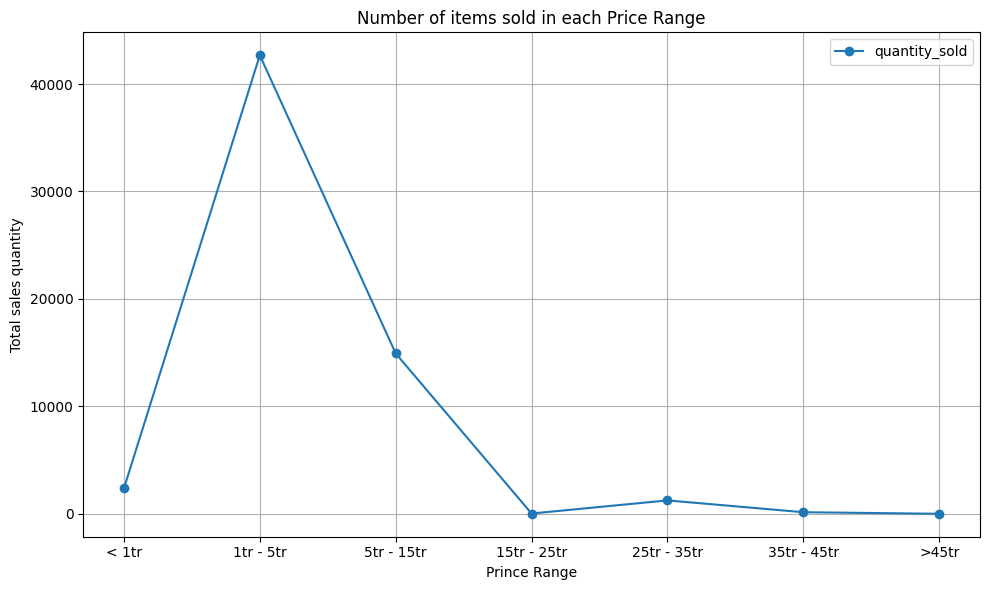

In [30]:
#Price distribution analysis.
price_bins = [0, 1000000, 5000000, 15000000, 25000000, 35000000, 45000000, float("inf")]
price_labels = ["< 1tr","1tr - 5tr","5tr - 15tr","15tr - 25tr","25tr - 35tr","35tr - 45tr",">45tr"]

#Bin the price data.
df["price_range"] = pd.cut(df["price(vnd)"], bins=price_bins,labels=price_labels, right=False)
#Count total quantity sold in each bin.
price_range_counts = df.groupby("price_range")['quantity_sold'].sum()
# #Count the number of products that record revenue in each bin
# products_record_revenue_counts = df.loc[df['quantity_sold'] > 0.0]["price_range"].value_counts().sort_index()


#plot the graph
plt.figure(figsize=(10,6))
price_range_counts.plot(kind="line",marker="o")
plt.ylabel("Total sales quantity")
plt.xlabel("Prince Range")
plt.title("Number of items sold in each Price Range")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [31]:
price_range_counts

price_range
< 1tr           2362.0
1tr - 5tr      42678.0
5tr - 15tr     14927.0
15tr - 25tr       25.0
25tr - 35tr     1246.0
35tr - 45tr      147.0
>45tr              0.0
Name: quantity_sold, dtype: float64

* Các sản phẩm ghi nhận lượt bán nhiều nhất nằm trong khoảng giá **từ 1 triệu đến 15 triệu đồng.**

## Top 5 sản phẩm bán chạy nhất tính đến tháng 11/2024

In [33]:
df.sort_values(by='quantity_sold', ascending=False).head(5)

,id,product_name,price(vnd),original_price,discount,discount_rate(%),review_count,rating_average,quantity_sold,brand_name,origin,subcategory_name,category_name,total_sales_per_product,price_range
71,270975124,Điện Thoại Oppo A58 6GB/128GB - Hàng Chính Hãng,4090000,4990000,900000,18,147,5.0,28128.0,OPPO,Trung Quốc,dien-thoai-smartphone,Điện thoại,1.150435e+11,1tr - 5tr
40,184059211,Apple iPhone 13,11990000,20000000,8010000,40,2056,5.0,6832.0,Apple,Trung Quốc,dien-thoai-smartphone,Điện thoại,8.191568e+10,5tr - 15tr
167,277007015,Điện thoại Xiaomi Redmi Note 14 6GB/128GB - Hàng Chính Hãng,3850000,4990000,1140000,23,63,5.0,6442.0,Xiaomi,Trung Quốc,dien-thoai-smartphone,Điện thoại,2.480170e+10,1tr - 5tr
130,275510578,Điện thoại OPPO A79 5G (8GB/256GB) - Hàng Chính Hãng,5990000,7490000,1500000,20,32,5.0,5578.0,OPPO,Trung Quốc,dien-thoai-smartphone,Điện thoại,3.341222e+10,5tr - 15tr
242,278219968,Điện thoại OPPO A3 8GB/128GB - Hàng Chính Hãng,4090000,5290000,1200000,23,6,4.7,2207.0,OPPO,Trung Quốc,dien-thoai-smartphone,Điện thoại,9.026630e+09,1tr - 5tr


* Top 5 sản phẩm bán chạy nhất đều là các sản phẩm điện thoại smartphone với mức giá **nhỏ hơn 15 triệu**

## Top 5 sản phẩm có discount rate lớn nhất

In [34]:
df.sort_values(by='discount_rate(%)', ascending=False).head(5)

,id,product_name,price(vnd),original_price,discount,discount_rate(%),review_count,rating_average,quantity_sold,brand_name,origin,subcategory_name,category_name,total_sales_per_product,price_range
249,278294720,Củ Sạc Samsung Không Kèm Cáp 25W - Hàng Chính Hãng - Đen,250000,540000,290000,54,0,0.0,9.0,Samsung,Trung Quốc,dien-thoai-smartphone,Điện thoại,2.250000e+06,< 1tr
179,277315433,"Điện thoại Xiaomi Redmi Note 9T 4GB/128GB 5G Dimensity 800U 5G, Có NFC , Rom tiếng việt - Hàng nhập khẩu Nhật",2369000,4690000,2321000,49,0,0.0,0.0,NaN,NaN,dien-thoai-smartphone,Điện thoại,0.000000e+00,1tr - 5tr
97,273949286,Laptop Asus Expertbook B1502 - B1502CV (Intel Core i5-1335U | RAM 8GB | 512GB SSD | Intel UHD Graphics | 15.6 inch Full HD | Win 11 bản quyền) - Hàng Chính Hãng,13155000,22900000,9745000,43,0,0.0,1.0,Asus,Trung Quốc,laptop-truyen-thong,Laptop,1.315500e+07,5tr - 15tr
208,277737595,Điện Thoại Samsung Galaxy A06 5G 4GB/128GB - Hàng Chính Hãng,2578000,4490000,1912000,43,6,4.8,16.0,Samsung,Trung Quốc,dien-thoai-smartphone,Điện thoại,4.124800e+07,1tr - 5tr
102,274101262,Máy Tính Bảng Samsung Galaxy Tab A9 Plus Wifi 4GB/64GB - Đã Kích Hoạt Bảo Hành Điện Tử - Hàng Chính Hãng,3590000,5990000,2400000,40,103,4.8,434.0,Samsung,Trung Quốc,may-tinh-bang,Máy tính bảng,1.558060e+09,1tr - 5tr


* **Iphone 13** có discount rate nằm trong top 5 và cũng nằm trong top 5 các sản phẩm bán chạy nhất tính đến tháng 11/2024